Chapter 2 of the Deep Learning book is about Linear Algebra basics. 

There is a particularly nice visualization of eigenvectors, which I think gives a more intuitive understanding of their properties. The plot can be found on page 58 in the book, where a circle of unit-norm vectors is manipulated by a random matrix in 2-dimensional space.

Here is how to easily re-create the plots - for educational purposes :)

In python we import numpy and matplotlib

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to define a random 2-by-2 matrix. I use a symmetric one in this case, since it gives orthonormal eigenvectors that are also used in the book.

In [35]:
matrix = np.array([[2, 4], [4, 2]])
# eigenvectors and values
eig = np.linalg.eig(matrix)
print "eigenvalues: ", eig[0]

# eigenvector 1 and 2
v1 = eig[1][:, 0]
v2 = eig[1][:, 1]

# check for unit norm
print "eigenvector 1: ", v1
print np.isclose(np.linalg.norm(v1), 1.0)
print "eigenvector 2: ", v2
print np.isclose(np.linalg.norm(v2), 1.0)
# orthogonal
print(v1.dot(v2) == 0)

eigenvalues:  [ 6. -2.]
eigenvector 1:  [ 0.70710678  0.70710678]
True
eigenvector 2:  [-0.70710678  0.70710678]
True
True


Next, we need to get the circle of unit-norm vectors.
I decided to use the concept of rotation matrices within discrete degrees from [0, 360], which yield a set of rotations of the first eigenvector and should give us a unit-norm nice circle.

Using the quiver plot, we can also add the vectors as arrows instead of points on the 2-d plane.

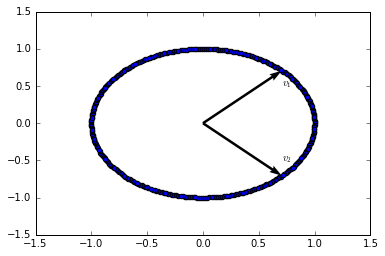

In [38]:
degrees = range(0, 360)
unit_vectors = []

for d in degrees:
    rotation_matrix = np.array([[np.cos(d), np.sin(d)], [-np.sin(d), np.cos(d)]])
    v_rot = rotation_matrix.dot(v1)
    unit_vectors.append(v_rot)

unit_vectors = np.array(unit_vectors)
plt.figure()
ax = plt.gca()
X = np.array([0, 0])
Y = np.array([0, 0])
Q = ax.quiver(X, Y, np.array([v1[1], v2[1]]), np.array([v1[0], v2[0]]),
          angles='xy', scale_units='xy', scale=1)

ax.annotate(r'$v_1$', xy=(v1[1], v1[0]), xytext=(v1[1], v1[0] - 0.2))
ax.annotate(r'$v_2$', xy=(v2[1], v2[0]), xytext=(v2[1], v2[0] + 0.2))

ax2 = plt.scatter(unit_vectors[:, 0], unit_vectors[:, 1])
plt.draw()
plt.show()

As one can see, the eigenvectors rest on the circle and are perpendicular.

In [39]:
unit_vectors_times_matrix = matrix.dot(unit_vectors.T).T
v1_times_matrix = matrix.dot(v1)
v2_times_matrix = matrix.dot(v2)

print v1_times_matrix
print v2_times_matrix
print v1_times_matrix.dot(v2_times_matrix) / (np.linalg.norm(v1_times_matrix, 2) * np.linalg.norm(v2_times_matrix, 2))

[ 4.24264069  4.24264069]
[ 1.41421356 -1.41421356]
0.0


The transformed eigenvectors are still orthonormal.

If we transform the whole unit circle, we should see that indeed only the two eigenvectors remain untouched by the matrix rotation-wise.

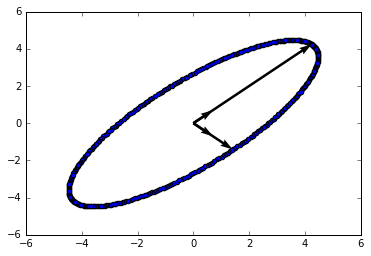

In [40]:
plt.figure()
ax = plt.gca()
X = np.array([0, 0, 0, 0])
Y = np.array([0, 0, 0, 0])
ax.quiver(X, Y, np.array([v1[1], v2[1], v1_times_matrix[0], v2_times_matrix[0]]), np.array([v1[0], v2[0], v1_times_matrix[1], v2_times_matrix[1]]),
          angles='xy', scale_units='xy', scale=1)
ax2 = plt.scatter(unit_vectors_times_matrix[:, 0], unit_vectors_times_matrix[:, 1])
plt.draw()
plt.show()